In [ ]:
!pip install accelerate datasets evaluate tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.1.0
    Uninstalling sentence-transformers-4.1.0:
      Successfully uninstalled sentence-transformers-4.1.0


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.3 MB/s eta 0:00:00


In [ ]:
import re
import string

In [ ]:
import pandas as pd
import numpy as np
import emoji
from sklearn.model_selection import train_test_split

In [ ]:
import evaluate
import transformers
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from transformers import EarlyStoppingCallback
from peft import LoraConfig, get_peft_model
import os

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import DataCollatorWithPadding
from transformers import (
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    AutoTokenizer, AutoModelForSequenceClassification
)

In [ ]:
np.random.seed(0)

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/train - train (3).csv')

In [ ]:
data_train = data_train.drop(columns=['Unnamed: 0'])

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/test_data.csv')

In [ ]:
data_test = data_test.drop(columns=['Unnamed: 0'])

In [ ]:
X_test = data_test['message.text']
y_test = data_test['Оценка']

In [ ]:
X = data_train['message.text']
y = data_train['Оценка']
X_test = data_test['message.text']
y_test = data_test['Оценка']

In [ ]:
def convert_emojis_to_words(text):

    # Convert emojis to words
    text = emoji.replace_emoji(text, replace=" ")

    # Remove the : from the words and replace _ with space
    text = text.replace("_", " ")

    return text

In [ ]:
symbols_pattern = re.compile(pattern = "["
    "@_!#$%^&*()<>?/\|}{~√•—"
                       "]+", flags = re.UNICODE) #спецсимволы
# двойные пробелы
space_pattern = re.compile('\s+')

In [ ]:
def clear_text(text):
    """ Функция удаления спецсимволов"""
    # удаление спецсимволов и emoji
    pre = symbols_pattern.sub(r'',text)
    pre = convert_emojis_to_words(pre)
    pre = re.sub(r'http\S+', '', pre)

    return space_pattern.sub(' ', pre)

In [ ]:
def preprocess_text(text):
    """ Финальная функция для обработки """
    # srip + lower + punctuation
    sentence = (
        ''.join([x for x in str(text).strip().lower()])
    )

    return clear_text(sentence)

In [ ]:
X = X.apply(preprocess_text)

In [ ]:
X_test = X_test.apply(preprocess_text)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state = 42)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", num_labels = 9)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[SEP]'})

0

In [ ]:
model.resize_token_embeddings(len(tokenizer))

Embedding(119547, 768, padding_idx=0)

In [ ]:
model.config.pad_token_id = tokenizer.pad_token_id

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y, tokenizer):
        super().__init__()
        self.X = X
        self.y = y
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        #text = self.text.iloc[idx]
        label = self.y.iloc[idx]
        output = self.tokenizer(
            text,
            max_length=512,
            padding='max_length',
            truncation=True
            #return_tensors="pt"
        )

        #one_hot_labels = torch.nn.functional.one_hot(label - 1, num_classes=10)
        output["label"]= torch.tensor(label)
        #output["label"] =
        return output

In [ ]:
tokenized_train = CustomDataset(X_train, y_train, tokenizer)
tokenized_test = CustomDataset(X_test, y_test, tokenizer)

In [ ]:
from transformers import DataCollatorWithPadding

# ... (rest of your code) ...

# Replace default_data_collator with DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
train_dataloader = DataLoader(
    CustomDataset(
        X = X_train,
        y = y_train,
        tokenizer = tokenizer),
    collate_fn=data_collator,
    batch_size=2,
    shuffle=True
)

In [ ]:
next(iter(train_dataloader))

{'input_ids': tensor([[  101, 16174,   156,  ...,   102,   102,   102],
        [  101, 13709,  2058,  ...,   102,   102,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([6, 6])}

In [ ]:
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")
one_balance_accuracy = evaluate.load("accuracy")

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.from_numpy(logits)
    labels = torch.from_numpy(labels)
    if torch.isnan(logits).any() or torch.isinf(logits).any():
        print("Warning: NaN or inf values detected in logits.")
    predictions = np.argmax(logits, axis=-1)
    global f1_metric, accuracy_metric
    f1 = f1_metric.compute(predictions=predictions, references=labels,
      average='weighted')['f1']
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)['accuracy']
    one_balance_accuracy
    return {"accuracy": accuracy, "f1":f1}


# Обучение c LoRA

In [ ]:
training_args = TrainingArguments(
    output_dir="//content/drive/MyDrive/finetuning_rubert_LoRA3/",
    per_device_train_batch_size= 64,
    per_device_eval_batch_size=64,
    eval_accumulation_steps=100,
    learning_rate=1e-3,
	  num_train_epochs=25,
    gradient_accumulation_steps=2, # Accumulate gradients over 2 steps
	  warmup_ratio=0.1,
    weight_decay=0.01,
    bf16=True, # bfloat16 training
    logging_strategy="steps",
    logging_steps=20,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    optim="adamw_torch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy")
    #report_to="tensorb")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
peft_config = LoraConfig(
    r=16,  # Rank of the LoRA update matrices
    lora_alpha=16,  # Scaling factor for the LoRA update matrices
    lora_dropout=0.5,  # Dropout probability for the LoRA update matrices
    bias="lora_only",
    modules_to_save=["decode_head"],# Whether to apply bias to the LoRA update matrices
    task_type="SEQ_CLS" ) # Task type for sequence classification


model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 615,177 || all params: 178,457,106 || trainable%: 0.3447


In [ ]:
trainer = Trainer(
    model,
    args=training_args,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),  # Use the Dataset object
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),  # Use the Dataset object
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(2, 0.0)]
)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
20,1.983200,1.799185,0.301634,0.237963
40,1.663000,1.562941,0.344725,0.275735
60,1.418400,1.300004,0.460624,0.413626
80,1.232800,1.128234,0.579495,0.577769
100,1.103700,1.015477,0.646360,0.634396
120,0.942000,0.810849,0.759287,0.760409
140,0.705300,0.687458,0.812779,0.813553
160,0.590700,0.562711,0.851412,0.851205
180,0.456200,0.510285,0.861813,0.861825
200,0.398100,0.526013,0.852897,0.852972


TrainOutput(global_step=525, training_loss=0.5232779802594866, metrics={'train_runtime': 373.6122, 'train_samples_per_second': 179.866, 'train_steps_per_second': 1.405, 'total_flos': 1.78053652611072e+16, 'train_loss': 0.5232779802594866, 'epoch': 25.0})

In [ ]:
model_id = "//content/drive/MyDrive/finetuning_rubert_LoRA3/deepPavlov_with_lora"
model.save_pretrained(model_id)

In [ ]:
test_dataset=CustomDataset(X_test, y_test, tokenizer=tokenizer)

In [ ]:
test = trainer.predict(test_dataset)

In [ ]:
y_pred = np.argmax(test[0],axis=1)

In [ ]:
print(test[2])

{'test_loss': 0.8780518174171448, 'test_accuracy': 0.8300395256916996, 'test_f1': 0.8321231478255228, 'test_runtime': 1.7651, 'test_samples_per_second': 430.016, 'test_steps_per_second': 6.799}


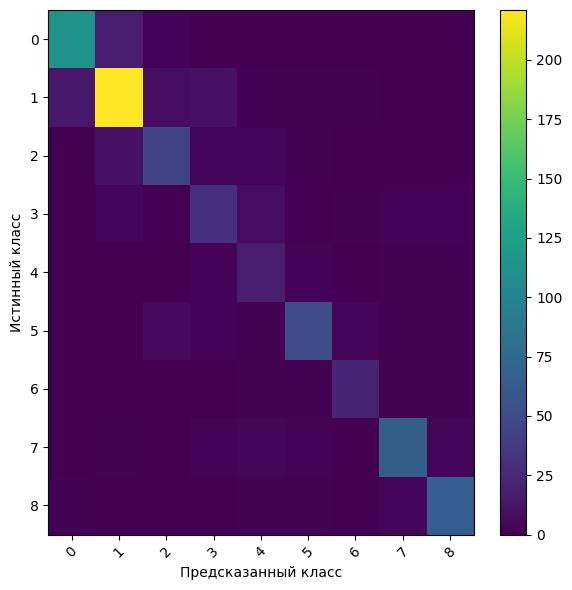

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
unique_labels = np.unique(y_test).astype(int)
ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(unique_labels, rotation=45)
ax.set_yticklabels(unique_labels)
ax.set_ylabel('Истинный класс')
ax.set_xlabel('Предсказанный класс')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# Сначала получим список всех классов
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)


       accuracy  f1_score
class                    
0      0.849624  0.865900
1      0.866667  0.868369
2      0.704918  0.722689
3      0.659574  0.639175
4      0.750000  0.600000
5      0.784615  0.822581
6      0.846154  0.830189
7      0.855263  0.872483
8      0.916667  0.904110


# Частичное обучение

In [ ]:
for name, param in model.bert.named_parameters():
  print(name)
  if 'encoder.layer.' in name:
      layer_num = int(name.split('.')[2])
      if layer_num >= (model.config.num_hidden_layers - 2):
          param.requires_grad = True
      else:
          param.requires_grad = False

embeddings.word_embeddings.weight
embeddings.position_embeddings.weight
embeddings.token_type_embeddings.weight
embeddings.LayerNorm.weight
embeddings.LayerNorm.bias
encoder.layer.0.attention.self.query.weight
encoder.layer.0.attention.self.query.bias
encoder.layer.0.attention.self.key.weight
encoder.layer.0.attention.self.key.bias
encoder.layer.0.attention.self.value.weight
encoder.layer.0.attention.self.value.bias
encoder.layer.0.attention.output.dense.weight
encoder.layer.0.attention.output.dense.bias
encoder.layer.0.attention.output.LayerNorm.weight
encoder.layer.0.attention.output.LayerNorm.bias
encoder.layer.0.intermediate.dense.weight
encoder.layer.0.intermediate.dense.bias
encoder.layer.0.output.dense.weight
encoder.layer.0.output.dense.bias
encoder.layer.0.output.LayerNorm.weight
encoder.layer.0.output.LayerNorm.bias
encoder.layer.1.attention.self.query.weight
encoder.layer.1.attention.self.query.bias
encoder.layer.1.attention.self.key.weight
encoder.layer.1.attention.self.key

In [ ]:
training_args1 = TrainingArguments(
    output_dir="checkpoints/",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    eval_accumulation_steps=20,
    learning_rate=1e-4,
	  num_train_epochs=11,
    logging_strategy="steps",
    logging_steps=100,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="tensorboard",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args1,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
100,1.368500,0.838316,0.711738,0.706398
200,0.394700,0.433397,0.866270,0.866329
300,0.175300,0.464208,0.861813,0.862041
400,0.102900,0.474839,0.864785,0.864984


TrainOutput(global_step=462, training_loss=0.45184048326500564, metrics={'train_runtime': 434.6569, 'train_samples_per_second': 68.026, 'train_steps_per_second': 1.063, 'total_flos': 7780156638363648.0, 'train_loss': 0.45184048326500564, 'epoch': 11.0})

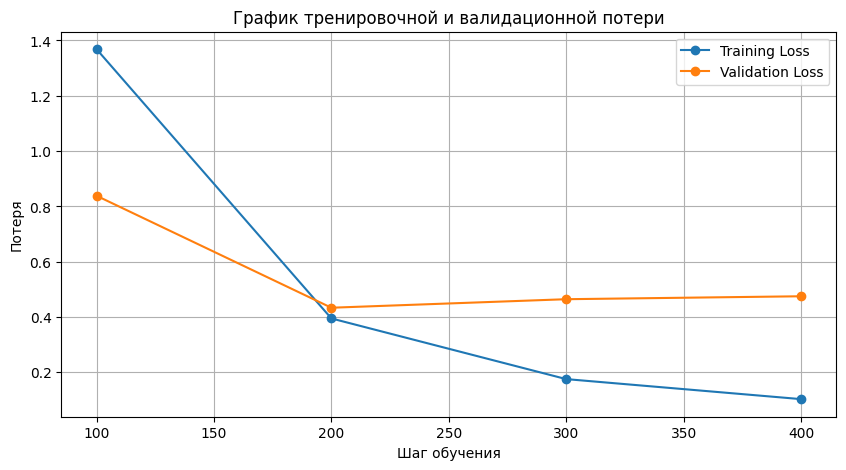

<Figure size 640x480 with 0 Axes>

In [ ]:
# Извлекаем историю логирования
log_history = trainer.state.log_history

# Списки для тренировочной и валидационной потерь и соответствующих шагов
train_steps, train_losses = [], []
eval_steps, eval_losses = [], []

for entry in log_history:
    # Тренировочная потеря
    if "loss" in entry:
        # Используем шаг обучения, если он есть, иначе порядковый номер
        train_steps.append(entry.get("step", len(train_steps) + 1))
        train_losses.append(entry["loss"])
    # Валидационная потеря
    if "eval_loss" in entry:
        eval_steps.append(entry.get("step", len(eval_steps) + 1))
        eval_losses.append(entry["eval_loss"])

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, marker="o", label="Training Loss")
plt.plot(eval_steps, eval_losses, marker="o", label="Validation Loss")
plt.xlabel("Шаг обучения")
plt.ylabel("Потеря")
plt.title("График тренировочной и валидационной потери")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('mistral_train_val.png')

In [ ]:
test_dataset1 = CustomDataset(X_test, y_test, tokenizer=tokenizer)

In [ ]:
test1 = trainer.predict(test_dataset1)

In [ ]:
y_pred1 = np.argmax(test1[0],axis=1)

In [ ]:
print(test1[2])

{'test_loss': 0.7933368682861328, 'test_accuracy': 0.8300395256916996, 'test_f1': 0.8309270304483287, 'test_runtime': 4.7924, 'test_samples_per_second': 158.375, 'test_steps_per_second': 2.504}


In [ ]:
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred1, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred1[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)

       accuracy  f1_score
class                    
0      0.864662  0.861423
1      0.866667  0.875248
2      0.737705  0.750000
3      0.680851  0.646465
4      0.708333  0.653846
5      0.800000  0.818898
6      0.730769  0.775510
7      0.855263  0.849673
8      0.888889  0.876712
